In [2]:
import pandas as pd
import numpy as np

## Regresión 


In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv'

In [4]:
!wget $data

--2025-06-24 20:38:23--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.8’

data.csv.8          100%[===================>]   1.41M  --.-KB/s    in 0.03s   

2025-06-24 20:38:23 (49.8 MB/s) - ‘data.csv.8’ saved [1475504/1475504]



In [5]:
df = pd.read_csv('data.csv')

In [6]:
df.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


In [7]:
df.columns = df.columns.str.lower().str.replace(' ','_') #nombres de las columnas en minuscula y con _
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Tipos de datos de las columnas

In [8]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [9]:
df.dtypes[df.dtypes == 'object'] #Mantiene solo los objetos que cumplen con la condición

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [129]:
strings = list(df.dtypes[df.dtypes == 'object'].index) #retorna una lista con solo el índice de los que cumplen la condición de ser categóricas, es decir, 
#los nombres de las categorias 
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [11]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Análisis exploratorio

In [12]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5]) #solo muestra los 5 primeros valores únicos
    print(df[col].nunique()) #muestra el número de valores únicos
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [13]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


### Gráficas del AE

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
#librerías de gráficos
%matplotlib inline

#### Distribución de precios

<Axes: xlabel='msrp', ylabel='Count'>

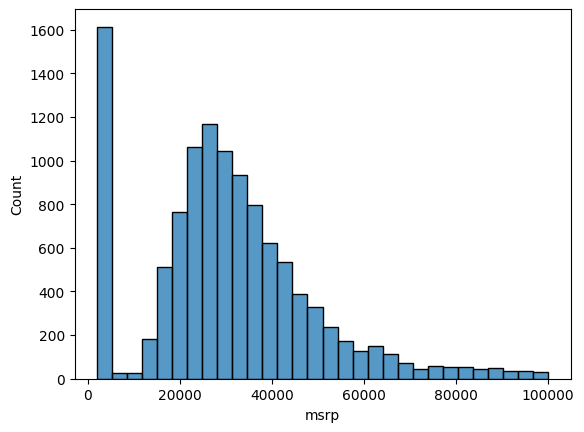

In [15]:
sns.histplot(df.msrp[df.msrp < 100000], bins=30) #retorna una distribución de long tail 

##### Dado que la distribución cuenta con una cola hacía la derecha, aplicamos la distribución logaritmica con el fin de reducirla

In [16]:
np.log([0.00001, 1,10,100,1000,1000000]) #tener cuidado con valores cercanos a 0 tratando el logaritmo, podemos usar la función np.log1p para sumar 1 
#a cada valor y no preocuparnos de 0

array([-11.51292546,   0.        ,   2.30258509,   4.60517019,
         6.90775528,  13.81551056])

In [17]:
np.log1p([0, 1,10,100,1000,1000000])

array([ 0.        ,  0.69314718,  2.39789527,  4.61512052,  6.90875478,
       13.81551156])

In [18]:
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

#### Gráficamos los valores después de haber aplicado el logaritmo

<Axes: xlabel='msrp', ylabel='Count'>

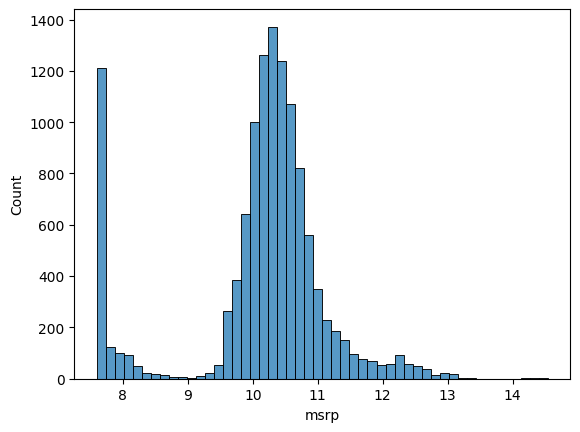

In [19]:
sns.histplot(price_logs, bins=50)

##### Para que los modelos funcionen bien la distribución debe ser o aproximarse a una normal, en este caso, lo parece

### Valores NA

In [20]:
df.isnull() #revisa si los valores de cada celda son Nan

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11910,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11911,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11912,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
df.isnull().sum() #revisa si hay nan en cada columna y los suma

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Tamaños de para entrenar y validar el modelo

In [22]:
n = len(df)

n_val = int(n * 0.2) 

n_test = int(n * 0.2) 

n_train = n - n_val - n_test


In [23]:
n, n_val + n_test + n_train

(11914, 11914)

In [24]:
idx = np.arange(n) #es una lista de los n índices

In [25]:
np.random.seed(2)
np.random.shuffle(idx) #aleatoriza el orden de la lsita idx con el fin de tomar valores desordenados

In [26]:
#idx es la lista con los indices desordenados
df_train = df.iloc[idx[:n_train]] #agarra los elementos hasta n_train del idx para el train
df_val = df.iloc[idx[n_train:n_train+n_val]] #agarra los elementos de n_train a n_val para el df de validación
df_test = df.iloc[idx[n_train+n_val:]] #agarra los elementos de n_val hasta n para el df de test

In [27]:
df_train.reset_index(drop=True) #resetea el index y borra el anterior desorganizado
df_val.reset_index(drop=True) 
df_test.reset_index(drop=True) 

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
1,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
2,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
3,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
4,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
2378,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
2379,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2380,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


In [28]:
y_train = np.log1p(df_train.msrp.values) #logaritmo de los valores del df_train
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [29]:
"""del df_train['msrp'] #se borran con el fin de que no se usen en la predicción de si mismo
del df_val['msrp']
del df_test['msrp']"""

"del df_train['msrp'] #se borran con el fin de que no se usen en la predicción de si mismo\ndel df_val['msrp']\ndel df_test['msrp']"

## Regresión Lineal


In [30]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
msrp                                      479775
Name: 7557, dtype: object

In [31]:
xi = [453, 11, 86]
w0 = 7.17

In [32]:
w = [0.01,0.04,0.002]

In [33]:
"""def linear_regression(xi):
    n = len(xi)
    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred"""

'def linear_regression(xi):\n    n = len(xi)\n    pred = w0\n\n    for j in range(n):\n        pred = pred + w[j] * xi[j]\n\n    return pred'

In [34]:
"""linear_regression(xi)""" #valor en logaritmo

'linear_regression(xi)'

In [35]:
np.exp(12.312) - 1 #valor real sin logaritmo y con -1 por el log1p

np.float64(222347.2221101062)

### 2.6 Regresión lineal en forma de vectores

In [36]:
def dot(xi, w):
    res = 0
    for i in range(len(w)):
        res+= xi[i] * w[i]
    return res

In [37]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [38]:
linear_regression(xi)

12.312000000000001

In [39]:
#se puede crear una lista donde el para unir w0 a w_i
w_new = [w0] + w

In [40]:
def linear_regression(xi):
    xi_new = [1] + xi
    return dot(xi_new, w_new)

linear_regression(xi)

12.312

#### Ejemplos

In [41]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x3 = [1, 453, 11, 86]

X = [x1,x2,x3]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [42]:
X.dot(w_new) #predicciones del logaritmo del precio

array([12.38 , 13.552, 12.312])

### 2.7 Entrenamiento de regresión lineal

In [43]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 1385],
    [142, 25, 431],
    [453, 31, 86],
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54, 1385],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [44]:
"""ones = np.ones(X.shape[0]) #para agregarle w0
ones"""

'ones = np.ones(X.shape[0]) #para agregarle w0\nones'

In [45]:
"""X = np.column_stack([ones, X]).round(1) #función de numpy que une dos columnas
X"""

'X = np.column_stack([ones, X]).round(1) #función de numpy que une dos columnas\nX'

In [46]:
y = [10,12,13,9,10,14,12,8,10] #precios que queremos predecir

In [47]:
XTX = X.T.dot(X) #matriz gram
XTX_inv = np.linalg.inv(XTX) #inversa matrix gram
w_full = XTX_inv.dot(X.T).dot(y) #formula para hallar w
w_full

array([0.02336695, 0.12330388, 0.00299035])

In [48]:
w0 = w_full[0] #w0
w = w_full[1:] #resto de coeficientes

In [49]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X]).round(1)
    
    XTX = X.T.dot(X) #matriz gram
    XTX_inv = np.linalg.inv(XTX) #inversa matrix gram
    w_full = XTX_inv.dot(X.T).dot(y) #formula para hallar w
    
    return w_full[0], w_full[1:]

train_linear_regression(X, y)

(np.float64(7.386969002904885), array([0.01022758, 0.00021669, 0.00168439]))

### 2.8 Modelo con bien trabajado

In [50]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [51]:
#df_train.dtypes == float or df_train.dtypes == int

In [52]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [53]:
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity'] #variables numericas que vamos a usar para predecir el precio

In [54]:
X_train = df_train[base].values #se extraen los valores de las columnas en base

In [55]:
df_train[base].isnull().sum() #revisamos si hay na's

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [56]:
X_train = df_train[base].fillna(0).values #reemplazamos los na con ceros de train

In [57]:
w0, w = train_linear_regression(X_train, y_train) #coeficientes
w

array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
       -9.06908672e-06])

In [58]:
y_pred = w0 + X_train.dot(w) #producto entre los valores de X_train y los coeficientes
y_pred 

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111], shape=(7150,))

<Axes: ylabel='Count'>

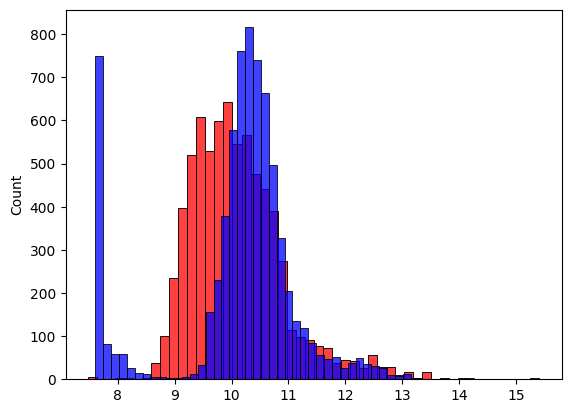

In [59]:
sns.histplot(y_pred, color='red', bins=50)
sns.histplot(y_train, color='blue', bins=50) #gráfica de valores predichos y reales

### 2.9 RMSE

In [60]:
def rmse(y_act, y_pred):
    error = y_act - y_pred
    se = error **2
    mse = se.mean()
    rmse = np.sqrt(mse)

    return rmse

In [61]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

### 2.10 Validando modelo

In [62]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [63]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.761653099130156)

El RMSE es la desviación estandar los residuos, hay que tener en cuenta que estamos trabajando con el log de los precios

### 2.11 Características

In [64]:
2025 - df_train.year #Edad del carrero para agregarla al modelo

2735     17
6720     13
5878      9
11190    34
4554      8
         ..
434      10
1902     10
9334     10
5284     11
2420      8
Name: year, Length: 7150, dtype: int64

In [65]:
def prepare_X(df):
    df = df.copy() #se hace una copia para no editar el original
    df['age'] = 2017 - df.year #le agregamos al df original una nueva columna llamada age
    features = base + ['age']
    
    df_num = df[features] #df con variables numericas
    df_num = df_num.fillna(0) #rellenamos na
    X = df_num.values
    return X

In [66]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5172055461058299)

<Axes: ylabel='Count'>

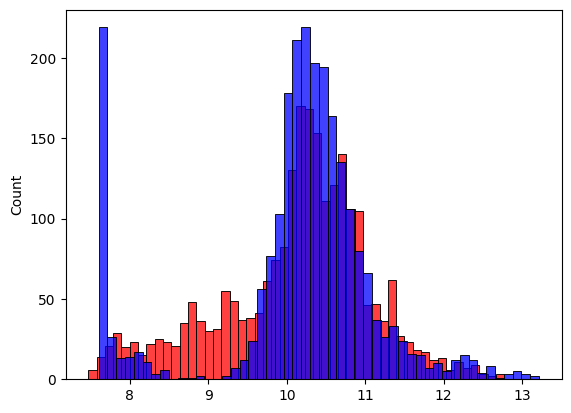

In [67]:
sns.histplot(y_pred, color='red', bins=50)
sns.histplot(y_val, color='blue', bins=50) 

### 2.12 Variables categóricas

Variables que son strings

In [68]:
df_train['number_of_doors'] == 2 #se usan vectores binarios para representar las diferentes variables categóricas 

2735      True
6720     False
5878     False
11190    False
4554     False
         ...  
434       True
1902      True
9334     False
5284     False
2420     False
Name: number_of_doors, Length: 7150, dtype: bool

In [69]:
for v in [2,3,4]:
    df_train['num_doors_%s' % v] = (df_train['number_of_doors'] == v).astype('int') #Se crean 3 vectores binarios para el número de puertas

/tmp/ipykernel_2563/4021868862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['num_doors_%s' % v] = (df_train['number_of_doors'] == v).astype('int') #Se crean 3 vectores binarios para el número de puertas
/tmp/ipykernel_2563/4021868862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['num_doors_%s' % v] = (df_train['number_of_doors'] == v).astype('int') #Se crean 3 vectores binarios para el número de puertas
/tmp/ipykernel_2563/4021868862.py:2: SettingWithCopyWarning: 
A value is t

In [70]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,num_doors_2,num_doors_3,num_doors_4
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410,1,0,0
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685,0,0,1
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795,0,0,1
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000,0,1,0
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900,1,0,0
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215,1,0,0
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675,0,0,1
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300,0,0,1


In [71]:
def prepare_X(df):
    df = df.copy() #se hace una copia para no editar el original
    df['age'] = 2017 - df.year #le agregamos al df original una nueva columna llamada age
    features = base + ['age']

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df['number_of_doors'] == v).astype('int') #agregamos las variables de las puertas
        features.append('num_doors_%s' % v)
        
    df_num = df[features] #df con variables numericas
    df_num = df_num.fillna(0) #rellenamos na
    X = df_num.values
    return X

In [72]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.515799564150169)

#### Hacemos lo mismo pero con la variable de marca y agarramos las 5 con mas registros

In [73]:
makes = list(df.make.value_counts().head().index) #numero de veces que se encuentra cada observación

In [74]:
def prepare_X(df):
    df = df.copy() #se hace una copia para no editar el original
    df['age'] = 2017 - df.year #le agregamos al df original una nueva columna llamada age
    features = base + ['age']

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df['number_of_doors'] == v).astype('int') #agregamos las 3 listas de las puertas con los valores de 0, 1 si corresponde
        features.append('num_doors_%s' % v) #se agrega a la lista de features a las que le vamos a hallar los coeficientes

    for v in makes:
        df['makes_%s' % v] = (df.make == v).astype('int') #agregamos las variables de las puertas al df original
        features.append('makes_%s' % v)
        
    df_num = df[features] #df con variables numericas
    df_num = df_num.fillna(0) #rellenamos na
    X = df_num.values
    return X

In [75]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5076038849556795)

In [76]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
num_doors_2            int64
num_doors_3            int64
num_doors_4            int64
dtype: object

In [77]:
categorical_variables = ['make','engine_fuel_type','driven_wheels','driven_wheels','market_category','vehicle_size' ,'vehicle_style'] 

In [78]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [79]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [80]:
def prepare_X(df):
    df = df.copy() #se hace una copia para no editar el original
    df['age'] = 2017 - df.year #le agregamos al df original una nueva columna llamada age
    features = base + ['age']

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df['number_of_doors'] == v).astype('int') #agregamos las 3 listas de las puertas con los valores de 0, 1 si corresponde
        features.append('num_doors_%s' % v) #se agrega a la lista de features a las que le vamos a hallar los coeficientes
        
    for k, values in categories.items():
        for v in values:
            df['%s_%s' % (k, v)] = (df[k] == v).astype('int') 
            features.append('%s_%s' % (k, v))   
    
        
    df_num = df[features] #df con variables numericas
    df_num = df_num.fillna(0) #rellenamos na
    X = df_num.values
    return X

In [81]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(552.5749084674836)

#### Valores muy altos, lo que implica que no siempre es buena idea tener muchas variables para predecir

### 2.13 Regularization

In [82]:
X = [
[4, 4, 4],
[3, 5, 5],
[5, 1, 1],
[5, 4, 4],
[7, 5, 5],
[4, 5, 5],
]

X = np.array(X)
X

array([[4, 4, 4],
       [3, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [4, 5, 5]])

In [83]:
XTX = X.T.dot(X)
XTX

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

In [84]:
np.linalg.inv(XTX)

LinAlgError: Singular matrix

#### matriz singular, por tanto no es invertible, pequeños cambios pueden hacerla invertible, como agregar valores pequeños a la diagonal

In [108]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X]) #se suman las matrices

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0]) #se agregan los valores a la diagonal matriz

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [109]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train) #probamos con el regularizado

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.46561484150317406)

### 2.14 Probamos el modelo regularizado con diferentes r

In [110]:
for r in [0.0,0.1,0.01,0.001,0.0001,0.00001,10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    
    score = rmse(y_val, y_pred)

    print(r, w0, score)

0.0 1.4952255600867038e+16 552.5749084674836
0.1 6.975751071514147 0.46567447653369765
0.01 7.092598651442054 0.46561998703346935
0.001 7.104915751503292 0.46561484150317406
0.0001 7.100061313100212 0.46561433026655413
1e-05 5.8857477530043285 0.4656143113942367
10 4.721445029067376 0.47734566187634564


### 2.15 Probando el modelo

In [90]:
df_train.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,num_doors_2,num_doors_3,num_doors_4
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410,1,0,0
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685,0,0,1
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795,0,0,1


In [91]:
df_val.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2779,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
3708,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
4794,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775


In [92]:
df_test.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11195,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
673,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
11270,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120


#### Unimos los dataframes

In [99]:
df_full_train = pd.concat([df_train,df_val])
df_full_train.reset_index(drop=True) #reseteamos los indices

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410,1.0,0.0,0.0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685,0.0,0.0,1.0
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795,0.0,0.0,1.0
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000,0.0,1.0,0.0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,35750,NaN,NaN,NaN
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,145740,NaN,NaN,NaN
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,74425,NaN,NaN,NaN
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,17595,NaN,NaN,NaN


In [100]:
X_full_train = prepare_X(df_full_train)

In [103]:
X_full_train #feature matrix con las características que vamos a usar

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]], shape=(9532, 36))

In [104]:
#concatenamos las y que vamos a comparar con el resultado del modelo

In [106]:
y_full_train = np.concatenate([y_train, y_val])

In [113]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [116]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)

score

np.float64(0.46404614065995764)

In [121]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031,
 'msrp': 35000}

In [122]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031,35000


In [124]:
X_small = prepare_X(df_small)

In [127]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

np.float64(10.436415096816313)

In [128]:
np.expm1(y_pred)

np.float64(34077.26591307305)